# Supervised Learning: Tree-Based Models

In this notebook, we attempted different tree-based supervised learning models. They are:
- Decision Tree
- Random Forest
- CatBoost
- XGBoost

This included running the model, testing it with the test set, scoring the model along with its classification report. 

**Conclusions from this notebook:**  

This was an attempt to document our process of choosing the most suitable model for this project. However, we did not use any of these models in the final ML pipeline. All the models attempted in this notebook and the other notebook produced high scores in Recall, F1 and accuracy. In the end, we chose to use Logistic Regression as it offered the most interpretable results, and we were better able to identify key features that TeejLab can use on the platform.

## Imports

In [1]:
import sklearn
import graphviz 
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE

## Read in train and test dataset

In [2]:
api_df = pd.read_excel("../../data/processed/preprocessed_train.xlsx")
api_test_df = pd.read_excel("../../data/processed/preprocessed_test.xlsx")
api_df.head()

,is_pii,is_fii,NRI score,authentication_processed,usage_base_processed,AI & Data Science,Business & Technology,Environment & Weather,Finance & Banking,GeoInformatics & Navigation,...,content-type,set-cookie,access-control-allow-origin,server,x-powered-by,x-aspnet-version,x-ratelimit-limit,metadata_fields_count,parameters_count,Risk_Label
0,True,False,77.850013,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,Low
1,True,False,77.850013,1,2,0,0,0,0,0,...,0,0,0,1,0,0,0,6,1,Low
2,False,False,76.479613,1,2,0,1,0,0,0,...,0,0,0,1,0,0,0,3,1,Medium
3,True,False,76.479613,1,2,0,0,0,0,0,...,1,0,0,0,0,0,0,5,0,Low
4,True,False,77.850013,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,2,3,Low


In [3]:
api_df.shape

(1316, 53)

In [4]:
# X, y split
X_train, y_train = api_df.drop(columns=["Risk_Label"]), api_df["Risk_Label"]
X_test, y_test = api_test_df.drop(columns=["Risk_Label"]), api_test_df["Risk_Label"]

In [5]:
# Smote function
def create_smote(X, y, k_neighbors):
    oversample = SMOTE(k_neighbors = k_neighbors)
    X, y = oversample.fit_resample(X, y)
    return X, y

In [6]:
# Balance training data
X_train, y_train = create_smote(X_train, y_train, 2)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## 1. Decision Tree

### Basic Approach

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = tree.DecisionTreeClassifier(random_state=37, max_depth = 6, criterion='gini')

In [9]:
clf = clf.fit(X_train,y_train)

In [10]:
clf.predict(X_test)

/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array(['Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium',
 

[Text(755.625, 587.0880000000001, 'is_pii <= 0.5\ngini = 0.667\nsamples = 1983\nvalue = [661, 661, 661]\nclass = Low'),
 Text(465.0, 456.624, 'x0_Missing <= 0.5\ngini = 0.221\nsamples = 754\nvalue = [75, 18, 661]\nclass = Medium'),
 Text(232.5, 326.1600000000001, 'x0_Broken Authentication <= 0.5\ngini = 0.117\nsamples = 80\nvalue = [75, 5, 0]\nclass = Low'),
 Text(116.25, 195.69600000000003, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = Low'),
 Text(348.75, 195.69600000000003, 'gini = 0.0\nsamples = 75\nvalue = [75, 0, 0]\nclass = Low'),
 Text(697.5, 326.1600000000001, 'is_fii <= 0.5\ngini = 0.038\nsamples = 674\nvalue = [0, 13, 661]\nclass = Medium'),
 Text(581.25, 195.69600000000003, 'metadata_fields_count <= 0.5\ngini = 0.003\nsamples = 662\nvalue = [0, 1, 661]\nclass = Medium'),
 Text(465.0, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Low'),
 Text(697.5, 65.23200000000008, 'gini = 0.0\nsamples = 661\nvalue = [0, 0, 661]\nclass = Medium'),
 Text(81

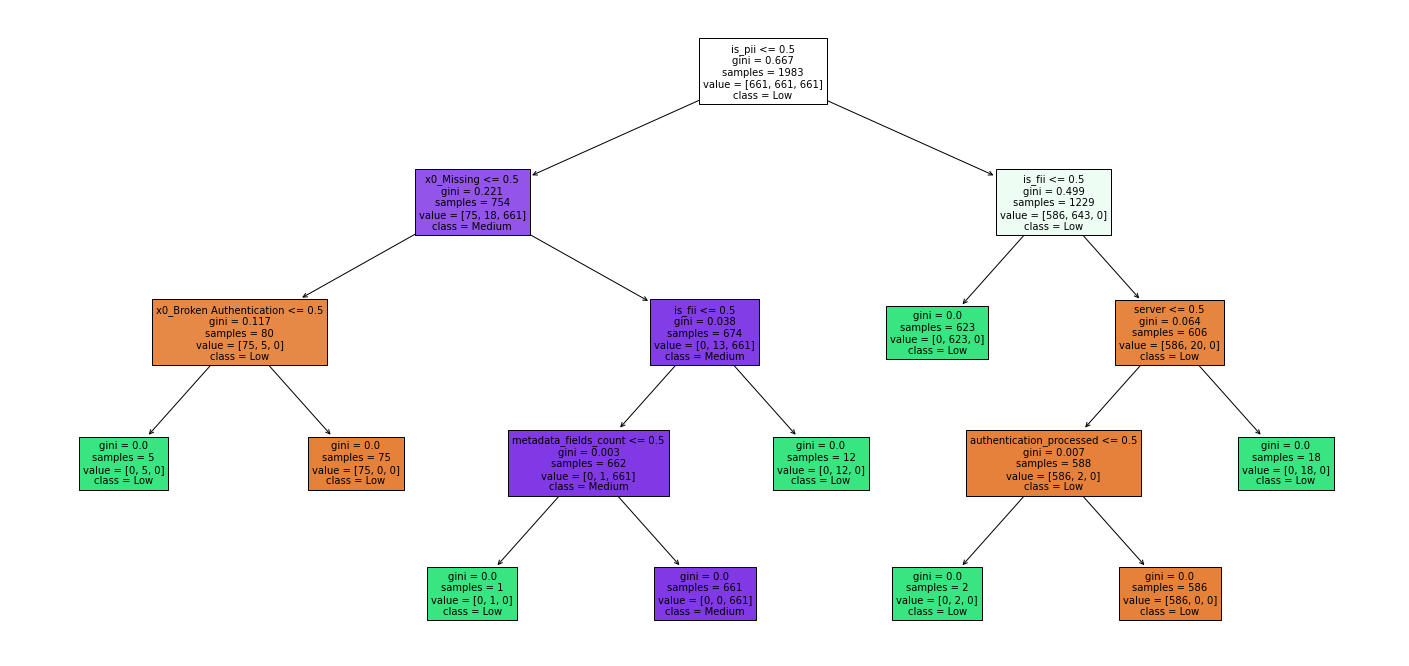

In [11]:
# Visualise the tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(25,12))
fn = list(X_train)
cn = list(y_train)
tree.plot_tree(clf, 
              feature_names = fn,
              class_names = cn,
              fontsize=10,
              filled=True)

In [12]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9964601769911504


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### Various hyperparameters to attempt

In [13]:
# max depth
clf_maxdepth = DecisionTreeClassifier(random_state=37, max_depth=5)
clf_maxdepth = clf_maxdepth.fit(X_train,y_train)
y_pred = clf_maxdepth.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Accuracy: 0.9964601769911504


In [14]:
# max_leaf_nodes
clf_maxleafnode = DecisionTreeClassifier(random_state=37, max_leaf_nodes=5)
clf_maxleafnode = clf_maxleafnode.fit(X_train,y_train)
y_pred = clf_maxleafnode.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9911504424778761


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### Scoring Metrics results

In [15]:
# Decision Tree
model = DecisionTreeClassifier(random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: Decision Tree")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Model: Decision Tree
Accuracy: 0.9964601769911504
F1 score: 0.6647683424508477
Recall: 0.6642547342178509


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification Report results

In [16]:
print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
    Low Risk       1.00      1.00      1.00       241
      Medium       1.00      1.00      1.00       324

    accuracy                           1.00       565
   macro avg       0.67      0.66      0.66       565
weighted avg       1.00      1.00      1.00       565



/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Random Forest

### Basic Approach

In [17]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [18]:
scoring_metric = ["accuracy", "f1_weighted"]
results = {}

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_clf = RandomForestClassifier(n_estimators=100, random_state=37, n_jobs=-1) # n_estimators = no. of trees in the forest
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=37)

In [20]:
results["Random forests"] = mean_std_cross_val_scores(
    rf_clf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_weighted,train_f1_weighted
Random forests,0.710 (+/- 1.035),0.041 (+/- 0.012),0.999 (+/- 0.001),1.000 (+/- 0.000),0.999 (+/- 0.001),1.000 (+/- 0.000)


### Scoring Metrics results

In [21]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: Random Forest")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

Model: Random Forest
Accuracy: 0.9982300884955753
F1 score: 0.665973665973666
Recall: 0.665283540802213


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification Report results

In [22]:
print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
    Low Risk       1.00      1.00      1.00       241
      Medium       1.00      1.00      1.00       324

    accuracy                           1.00       565
   macro avg       0.67      0.67      0.67       565
weighted avg       1.00      1.00      1.00       565



/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Comparing all the models including the above

### Reference:
https://pages.github.ubc.ca/mds-2021-22/DSCI_573_feat-model-select_students/lectures/05_ensembles.html

In [23]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=37),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=37),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=37),
    "XGBoost": XGBClassifier(random_state=37, eval_metric='logloss', verbosity=0),
}

In [24]:
results = {}
scoring_metric = ["accuracy", "f1_macro", "recall_macro"]

In [25]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [26]:
dummy = DummyClassifier(strategy="stratified")
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [27]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

/opt/miniconda3/envs/573/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/573/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/573/lib/python3.9/site-packages/xgboost/sklearn.py:88

In [28]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro,test_recall_macro,train_recall_macro
Dummy,0.002 (+/- 0.002),0.007 (+/- 0.004),0.348 (+/- 0.027),0.330 (+/- 0.004),0.348 (+/- 0.026),0.330 (+/- 0.004),0.348 (+/- 0.027),0.330 (+/- 0.004)
Decision Tree,0.010 (+/- 0.004),0.008 (+/- 0.002),0.997 (+/- 0.002),1.000 (+/- 0.000),0.997 (+/- 0.002),1.000 (+/- 0.000),0.997 (+/- 0.002),1.000 (+/- 0.000)
Random Forest,0.189 (+/- 0.044),0.021 (+/- 0.003),0.999 (+/- 0.001),1.000 (+/- 0.000),0.999 (+/- 0.001),1.000 (+/- 0.000),0.999 (+/- 0.001),1.000 (+/- 0.000)
CatBoost,2.302 (+/- 0.143),0.009 (+/- 0.001),0.998 (+/- 0.001),1.000 (+/- 0.000),0.998 (+/- 0.001),1.000 (+/- 0.000),0.998 (+/- 0.001),1.000 (+/- 0.000)
XGBoost,0.413 (+/- 0.102),0.010 (+/- 0.001),0.998 (+/- 0.002),1.000 (+/- 0.000),0.998 (+/- 0.002),1.000 (+/- 0.000),0.998 (+/- 0.002),1.000 (+/- 0.000)


## CatBoost

### Scoring Metrics results

In [29]:
# CatBoost
model = CatBoostClassifier(verbose=0, random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: CatBoost")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

Model: CatBoost
Accuracy: 0.9982300884955753
F1 score: 0.665973665973666
Recall: 0.665283540802213


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification Report results

In [30]:
print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
    Low Risk       1.00      1.00      1.00       241
      Medium       1.00      1.00      1.00       324

    accuracy                           1.00       565
   macro avg       0.67      0.67      0.67       565
weighted avg       1.00      1.00      1.00       565



/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
